In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [68]:

def load_data(file_path):
    """
    Carga los datos desde un archivo CSV.
    """
    data = pd.read_csv(file_path)
    # data = data.drop('Feature3',axis=1)
    return data.values

def initialize_centroids(data, k):
    """
    Inicializa los centroides seleccionando k puntos aleatorios de los datos.
    """
    indices = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[indices]
    return centroids

def assign_clusters(data, centroids):
    """
    Asigna cada punto de datos al centroide más cercano usando la distancia euclidiana.

    Args:
        data (np.ndarray): Matriz de datos.
        centroids (np.ndarray): Matriz de centroides.

    Returns:
        np.ndarray: Arreglo de asignaciones de clusters para cada punto de datos.
    """
    clusters = []
    for point in data:
        # Calcula la distancia euclidiana entre el punto y cada centroide
        distances = np.linalg.norm(point - centroids, axis=1)
        # Encuentra el índice del centroide más cercano
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

def update_centroids(data, clusters, k):
    """
    Actualiza los centroides recalculando la media de los puntos asignados a cada cluster.
    """
    new_centroids = []
    for i in range(k):
        points = data[clusters == i]
        new_centroid = points.mean(axis=0)
        new_centroids.append(new_centroid)
    return np.array(new_centroids)

def calculate_inertia(data, centroids, clusters):
    """
    Calcula la Suma de Errores Cuadráticos Internos (SSE).
    Calcula la inercia, que es la suma de las distancias al cuadrado de cada punto al centroide más cercano.
    """
    inertia = 0
    for i, centroid in enumerate(centroids):
        points = data[clusters == i]
        distances = np.linalg.norm(points - centroid, axis=1)
        inertia += np.sum(distances**2)
    return inertia

def kmeans(data, k, max_iters=100):
    """
    Implementa el algoritmo de K-Means.
    """
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    inertia = calculate_inertia(data, centroids, clusters)
    return centroids, clusters, inertia

def elbow_method(data, k_range):
    """
    Implementa el método del codo para seleccionar el mejor valor de K.
    """
    inertias = []
    for k in k_range:
        _, _, inertia = kmeans(data, k)
        inertias.append(inertia)
    return inertias

def calculate_errors(inertias):
    errors = np.diff(inertias)  # Diferencia entre valores consecutivos
    return abs(errors)


def plot_elbow_method(k_range, inertias):
    """
    Grafica el método del codo para seleccionar el mejor valor de K.
    """
    # Grafica el método del codo
    plt.figure(figsize=(8, 6))
    plt.plot(k_range, inertias, marker='o')
    plt.xlabel('Número de clusters, K')
    plt.ylabel('Inercia')
    plt.title('Método del Codo para determinar el valor óptimo de K')
    plt.show()

def plot_sse(k_range, sses):
    """
    Grafica el SSE en función del rango de valores de K.

    Args:
        k_range (range): Rango de valores de K.
        sses (list): Lista de valores de SSE calculados.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, sses, marker='o', linestyle='-', color='r')
    plt.xlabel('Número de Clusters (K)')
    plt.ylabel('Suma de Errores Cuadráticos Internos (SSE)')
    plt.title('SSE para Diferentes Valores de K')
    plt.grid(True)
    plt.show()


def plot_clusters(data, clusters, centroids):
    """
    Grafica los puntos y los centroides resultantes del algoritmo K-Means.
    """
    pca = PCA(2)
    data_pca = pca.fit_transform(data)
    centroids_pca = pca.transform(centroids)

    plt.figure(figsize=(10, 8))
    unique_clusters = np.unique(clusters)
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

    for i, cluster in enumerate(unique_clusters):
        points = data_pca[clusters == cluster]
        plt.scatter(points[:, 0], points[:, 1], color=colors[i], marker='o', alpha=0.5)
        plt.scatter(centroids_pca[i, 0], centroids_pca[i, 1], color=colors[i], marker='X', s=200, edgecolor='black', label=f'Centroid {i+1}')
        
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title('Clusters y Centroides (PCA)')
    plt.legend()
    plt.show()


In [69]:
# Carga los datos desde el archivo CSV
file_path = 'csv/sample_data.csv'
data = load_data(file_path)

In [70]:
# Define el rango de valores de K a probar
k_range = range(1, 11)

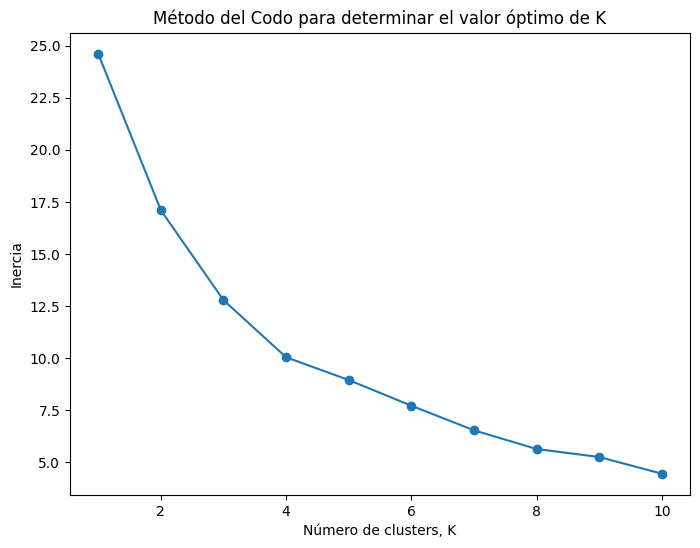

In [79]:
# Calcula las inercias para cada valor de K
inertias = elbow_method(data, k_range)
plot_elbow_method(k_range, inertias)

K = 1 -> ERROR: 24.615077835385712
K = 2 -> ERROR: 16.850991445417552
K = 3 -> ERROR: 12.997657762404431
K = 4 -> ERROR: 10.176846304715788
K = 5 -> ERROR: 8.870167633589604
K = 6 -> ERROR: 6.907543157437595
K = 7 -> ERROR: 6.345059947597173
K = 8 -> ERROR: 5.92816199756721
K = 9 -> ERROR: 5.485181622040104
K = 10 -> ERROR: 4.602122647119922


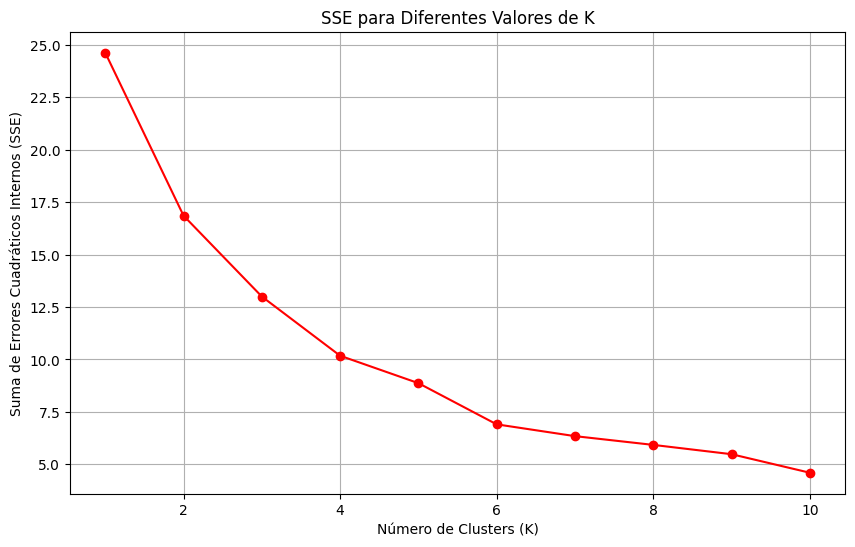

In [72]:

sses = elbow_method(data, k_range)

for sse, k in zip(sses, k_range):
    print(f"K = {k} -> ERROR: {sse}")

plot_sse(k_range, sses)

Centroides finales:
[[0.46098132 0.80877634 0.19453939]
 [0.34329105 0.59949376 0.73285039]
 [0.85595449 0.64513019 0.66534243]
 [0.41766439 0.17566703 0.43883703]]


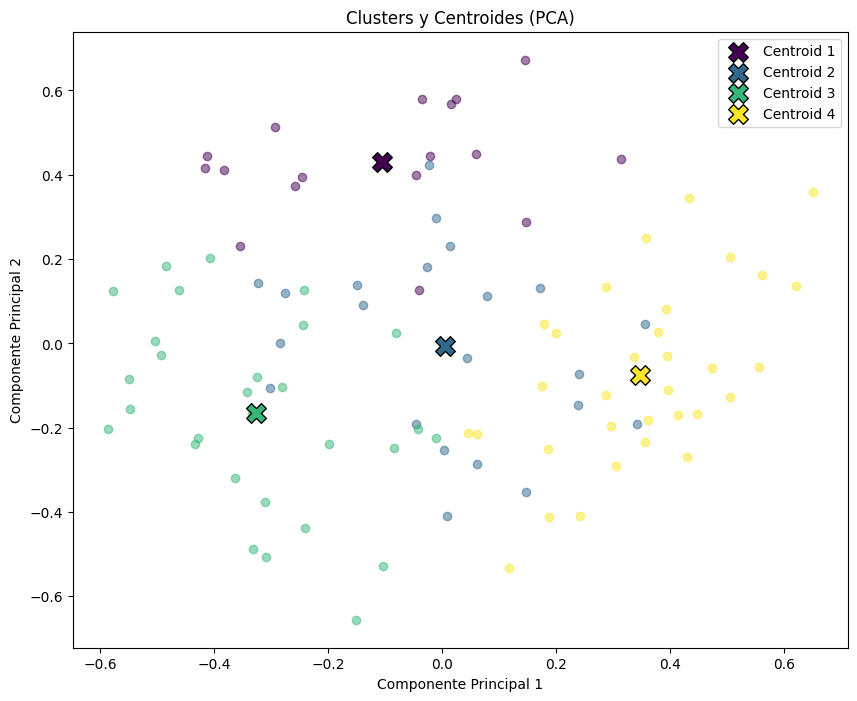

In [81]:
# Define el número de clusters
k = 4

# Ejecuta el algoritmo de K-Means
centroids, clusters, _ = kmeans(data, k)

# Imprime los resultados
print("Centroides finales:")
print(centroids)
# print("Asignaciones de clusters:")
# print(clusters)

# Grafica los clusters y los centroides
plot_clusters(data, clusters, centroids)